<h1> doeMain </h1> 

<p> doeMain is the package which helps in creating the design space for the experiments. This package consists of four classes. These are listed below:<p>
<p>
* doeMaster (Parent)
* pyDOEMaster (Child)
* diversipyMaster (Child)

<p> The usage of these classes as well as the sample outputs are mentioned in this notebook. <p> 
<p> There are three packages available in doeMain: <p>
* pyDOE 
* diversipy

<p> The contents of the classes are as mentioned below: <p>

<p>1. doeMaster
<ol>
    <li> Packages available </li>
    <li> LHS Correlation Score </li>
    <li> LHS Distance Score </li>
    <li> Input Distribution Types and functions </li>
    <li> Applying Distributions </li>
    <li> Slicing down the matrix </li>
    <li> Plotting the matrix </li>
    <li> Adding new samples to the existing matrix </li>
</ol>    
<p>2. pyDOEMaster
<ol>
    <li> Creating LHS </li>
</ol>    
<p>3. diversipyMaster
<ol>
    <li> Converting Co-ordinates to Unit Hypercube </li>
    <li> Creating LHD Matrix </li>
    <li> Improving the existing LHD Matrix </li>
    <li> Sliced LHS Matrix </li>
</ol>    


<p> For importing any package, a path must set to access the directories. This can be done as shown below. <p> 
* os.chdir() is used to set the location where these packages are existing. 
* os.getcwd() helps in getting the current working directory location where the path has been assigned to.

In [1]:
# Importing supporting modules for Notebook.

import os
import numpy as np

print(os.getcwd())



C:\Users\ra2\Documents\Python_Scripts\ExcelADE\FinalModule


<p> Any information about the package or module can be accessed using help function as shown below. It invokes the built-in help system. If no argument is given, the interactive help system starts on the interpreter console.  <p>

In [2]:
import doeMain
help(doeMain)

Help on module doeMain:

NAME
    doeMain

FILE
    c:\users\ra2\documents\python_scripts\excelade\finalmodule\doemain.py

CLASSES
    __builtin__.object
        doeMaster
            diversipyMaster
            pyDOEMaster
    
    class diversipyMaster(doeMaster)
     |  Child Class of doeMaster, for python Package diversipy
     |  
     |  Method resolution order:
     |      diversipyMaster
     |      doeMaster
     |      __builtin__.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initilize diversipyMaster Class
     |  
     |  convertCoordinateToUnitHypercube(self, inMatrix, method='center')
     |          diversipyMaster libraries always return the LHS as coordinate based values.
     |          We need to convert then to actual values from 0-1.
     |      :param inMatrix:
     |          inMatrix is lhs matrix with coordinates corresponding to the bins
     |      :param method:
     |          For each bin how should the point be 

<h3> 1. doeMaster <h3> 

<h4> Calling the Module <h4>

<p> doeMaster is the parent classes  having child class (pyDOEMaster,dakotaMaster,diversipyMaster) The following functions are supported in the doeMaster class, these methods can also be accessed from the child class <p>

In [3]:
# doeMaster 
doeMasterObj = doeMain.doeMaster()

<h4> 1.1 Packages available <h4>

<h4> Listing down the available packages </h4>

<p> doeMaster contains 3 packages. The list of all the packages available can be listed down by using the below code. The three packages which are available as of now are 'dakota', 'pyDOE' and 'diversipy' <p>

In [4]:
available_packages = doeMasterObj.listPackages()
available_packages

['pyDOE', 'diversipy']

<h4> Selecting the desired package<h4>

<p> The desired package, which are mentioned in the package list can be set for the further validation process. It can be set as doeMaster.setPackage('Package'). The available packages are 'dakota', 'pyDOE' and 'diversipy' <p>

In [5]:
pyDOEMasterObj = doeMasterObj.setPackage('pyDOE')

# ALTERNATIVELY you can also create the object directly.
# From subfolder doeModule get import class pyDOEMaster from doeMain.py
from doeModule.doeMain import pyDOEMaster

# Create a object, to Use the function of the Class.
pyDOEMasterObj = pyDOEMaster()

In [6]:
# Creating a simple LHS
matrix_created  = pyDOEMasterObj.lhs(nInputs = 3, nSamples = 3)
matrix_created

new candidate solution found with max,abs corrcoef = 0.998287933286
new candidate solution found with max,abs corrcoef = 0.959194847978
new candidate solution found with max,abs corrcoef = 0.798251148106


array([[ 0.53201422,  0.2579153 ,  0.97517905],
       [ 0.91315033,  0.35884323,  0.56742209],
       [ 0.03634984,  0.9875566 ,  0.05708005]])

<h4>Supporing Function For created Matrix</h4>
<p>We will be using the above created matrix to show example of supporting functions.
Later we will see, multiple ways of creating LHS matrix using various packages we have</p>

<h4>1.2 LHS Correlation Score <h4>

**_doeMaster.lhsCorrScore(inputMatrix)_** 
<p> This function calculates the correlation across the columns of a given matrix. Correlation represents the linear association between two vectors. The given function takes the input as a matrix and returns the correlation score across the columns as a Correlation Table. It also prints the "Rho" and the maximum pairwise correlation value of a given matrix <p>
<p> The input parameters for obtaining these correlation values should be in the form of a matrix. The below snippet shows how to obtain the correlation values out of a given input matrix <p> 
<p> The Correlation Table is the table containing Pearson product moment correlation co-efficients. The correlation table is obtained as <p>

\begin{equation*}
\ R_(i,j) = \frac {C_(i,j)} {\sqrt{C_(i,i)} \times \sqrt{C_(j,j)}}
\end{equation*}
<p>R : Correlation Co-efficient matrix<p> 
<p>C : Covariance Matrix<p>
<p> The Parameters that need to be given as input to this function are:
* inputMatrix : The matrix for which the Correlation scores need to calculated.

In [7]:
corr_score = doeMasterObj.lhsCorrScore(matrix_created)

*** RHO ***
0.811667324007
*** Max Pairwise Correlation ***
0.615714154174
*** Correlation Table ***
[[        nan -0.8384748   0.61571415]
 [-0.8384748          nan -0.94565725]
 [ 0.61571415 -0.94565725         nan]]


<h4>1.3 LHS Distance Score <h4>

**_doeMaster.lhsDistScore(inputMatrix)_**
<p> This function calculates the distance across the rows. This calculation is done in two norms, L1 - norm and L2 - norm. <p>
<p> *  L1 norm - It gives the absolute distance<p>
<p> *  L2 norm - It gives the least squares distance <p>
<p> The input parameters for this function are: <p>
* inputMatrix : The for which the score has to be calculated.

In [8]:
dist_score = doeMasterObj.lhsDistScore(matrix_created)

*** L1 Distance ***
Mean =  1.68302719502
Max =  2.14340468661
Min =  0.889820984149
*** L2 Distance ***
Mean =  1.01130004458
Max =  1.27317138826
Min =  0.567200942441


<p> “Print” command returns only the mean distance values of L1 and L2 norms <p> 

In [9]:
print dist_score

(1.6830271950241251, 1.0113000445766207)


<h4>1.4 Input Distribution Types and functions <h4> 

<h4> Available Distributions <h4> 

**_doeMaster.getInputDistributionTypes( )_**
<p> There are two distributions available in this package. The distributions available and the way the parameters should be considered can be displayed by using the below function 'getInputDistributionTypes' <p>
<p> If nothing is mentioned about the values associated with a given distribution, the function assumes the default values. <p>

In [10]:
doeMasterObj.getInputDistributionTypes()

,Name,Type,Keyword,Parameters,Default,Defaults
0,Uniform,Continuous,uniform,"['uniform',minValue,maxValue]",NaN,"['uniform',0,1]"
1,Normal,Continuous,norm,"['norm',loc,scale]",NaN,"['norm',0,1]"


<h4>1.5 Applying Distribution to Matrix <h4> 

**_doeMaster.applyDistributionToMatrix(inMatrix,inDistribution)_**
<p> This particular function takes the input matrix and multiply the columns of the matrix to the respective distribution given in the inDistribution <p>
<p> The input parameters for this function are:<p>
* inMatrix : The input matrix should be a unit hypercube, i.e., Input Matrix should be a unit matrix (with values between 0-1) to apply the distributions to the matrix. 
* inDistribution : The list of distributions that needs to be applied in such a way that ith distribution is applied to the ith input (i.e. ith column)

In [11]:
matrix_created_modified = doeMasterObj.applyDistributionToMatrix(matrix_created, inDistribution=[["norm", 0,1],["uniform",3,4],["uniform",0,20]])

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:3 and max :4
Uniform Distribution Applied with min:0 and max :20


In [12]:
matrix_created_modified # The input matrix will be updated based on the distributions mentioned in the previous step

array([[  0.08033408,   3.2579153 ,  19.5035809 ],
       [  1.36041277,   3.35884323,  11.34844187],
       [ -1.79471153,   3.9875566 ,   1.14160091]])

<h4>1.7 Plot Matrix <h4>

**_doeMaster.plotMatrix(inputMatrix,addGrid=False,nNewPoints = None)_**
<p> This function helps in visualising the matrix in a two-dimensional space. Plot Matrix helps in visualising the points of a Matrix, by plotting them One on One with taking each column as a vector and the values associated with that vector as the values on an axis. It plots a one on one matrix.  <p>
The input parameters to be given are:
* inputMatrix : The matrix to be plotted
* figsize : By default, the plot matrix considers the figure size to be (5,5). This can be adjusted based on the requirements.


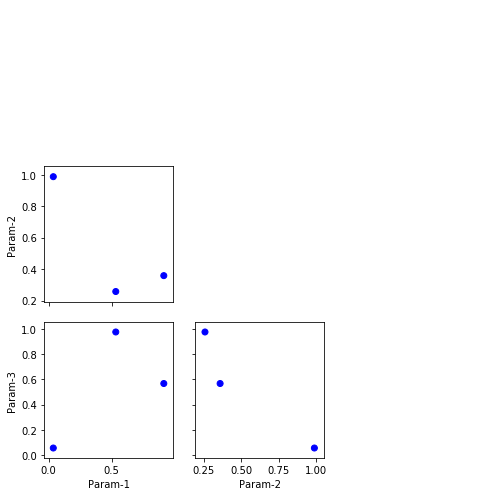

In [13]:
doeMasterObj.plotMatrix(matrix_created, figsize = (7,7))

<h4>1.8 Adding new rows (points) <h4> 

**_doeMaster.addNpointsLHS(inMatrix, m=none, method=none)_**
<p> The existing matrix can be modified by adding the new rows to the matrix. There are two methods by which the new rows (points) can be added. One method is 'random' and other is 'center'. Either of these two can be considered while modifying the matrix. The number of roes that are to be added can be specified by using 'm' <p> 
<p> The input parameters for this function are given below:<p>
* inMatrix : The existing matrix which is needed to be modified <p>
* m        : The number of rows that needs to added to the existing matrix. By Default, it considers m = 1. <p>
* method   : The methods to be used for generating the numbers. Two methods are available, 'random' and 'center', are available in the package<p>


In [14]:
addNpoints_center = doeMasterObj.addNpointsLHS(matrix_created, m =3, method = 'center')

[[ 0.25        0.58333333  0.25      ]
 [ 0.41666667  0.75        0.41666667]
 [ 0.75        0.08333333  0.75      ]]
[[ 0.25        0.58333333  0.25      ]
 [ 0.41666667  0.08333333  0.75      ]
 [ 0.75        0.75        0.41666667]]
3


In [15]:
print addNpoints_center

[[ 0.53201422  0.2579153   0.97517905]
 [ 0.91315033  0.35884323  0.56742209]
 [ 0.03634984  0.9875566   0.05708005]
 [ 0.25        0.58333333  0.25      ]
 [ 0.41666667  0.08333333  0.75      ]
 [ 0.75        0.75        0.41666667]]


<h3>2. pyDOEMaster <h3>

<p> doeMain contains class pyDOEMaster. An object has to be created first before calling the functions. Here, an object named "pyDOEMasterObj", we will use this object to access the functionality of the class.<p>

In [16]:
from doeModule.doeMain import pyDOEMaster
pyDOEMasterObj = pyDOEMaster()

<h4>2.1 Creating LHS <h4> 

**_pyDOEMaster.lhs(nInputs=None,nSamples=None, inputDistribution = None,criterion = 'corr')_**
<p> LHS is a method of generating the random samples of parameter values, from multi-dimensional distribution. It is pre-dominantly used in Monte Carlo Simulation. It reduces the number of runs required to achieve a reasonably accurate results. LHS is based on a Latin Square Design, in which there exists only a single sample in each row and column.<p> 
<p> The input parameters associated with this function are as listed below: <p>
<p>* nInputs : The number of inputs required for LHS. It can be found across the columns of a given row.
<p>* nSamples : The number of different samples required for LHS. It can be found across the rows of a given column. 
    * Inputs are displayed as the columns and the samples are displayed as the rows.
<p>* inputDistribution : The distribution that needs to be applied across the samples. User needs to specify the type of the distribution, i.e. 'uniform' or 'norm', and the specifications associated with them. 
    * For Uniform, it is minimum value and the maximum value.
    * For Normal, it is Location parameter, i.e. mean and the scale parameter, i.e. Deviation from the mean. 
<p>* criterion : There are 4 criteria that are available for this parameter.
    * c : Center the points within the sampling intervals
    * m : It maximizes the minimum distance between points, but places the point in a randomized location within its interval
    * cm : Same as 'm' but centred within the intervals
    * corr : It minimizes the maximum correlation co-efficient. By default, corr is applied to the function.
<p>


<p> Let's start by creating a simple LHS without any distributions mentioned. By default, the function considers the distribution to be 'uniform' with 0 and 1 as min and max values respectively. <h2> 

In [17]:
LHS_simple = pyDOEMasterObj.lhs(nInputs = 3, nSamples =3)

new candidate solution found with max,abs corrcoef = 0.965594258369
new candidate solution found with max,abs corrcoef = 0.944115586031


In [18]:
LHS_simple

array([[ 0.97990757,  0.78079585,  0.65135539],
       [ 0.53348479,  0.6620102 ,  0.27358369],
       [ 0.28564677,  0.2886439 ,  0.79170437]])

<p> We can create the LHS, by mentioning the type of the distribution, that an Input should possess across its sample. There are two distributions associated with LHS, normal and uniform, as mentioned above <p> 

In [19]:
LHS = pyDOEMasterObj.lhs(nInputs = 4, nSamples = 3, inputDistribution = [['uniform', 5,7],['norm', 2,3],['uniform', 6,19],['uniform', 1,4]])

new candidate solution found with max,abs corrcoef = 0.967962164503
Uniform Distribution Applied with min:5 and max :7
Uniform Distribution Applied with mean:2 and std :3
Uniform Distribution Applied with min:6 and max :19
Uniform Distribution Applied with min:1 and max :4


In [20]:
print LHS

[[  5.73474516  -1.737677    10.34057961   2.52952032]
 [  6.84041399   3.47610468   8.96109987   1.92873673]
 [  5.02049298   2.27883066  18.14919341   3.46909521]]


In [21]:
LHS_criteria = pyDOEMasterObj.lhs(nInputs = 4, nSamples = 3, inputDistribution = 
                               [['uniform', 5,7],['norm', 2,3],['uniform', 6,19],['uniform', 1,4]], criterion = 'cm')

Uniform Distribution Applied with min:5 and max :7
Uniform Distribution Applied with mean:2 and std :3
Uniform Distribution Applied with min:6 and max :19
Uniform Distribution Applied with min:1 and max :4


In [22]:
LHS_criteria

array([[  6.        ,   2.        ,  16.83333333,   3.5       ],
       [  6.66666667,  -0.9022647 ,   8.16666667,   2.5       ],
       [  5.33333333,   4.9022647 ,  12.5       ,   1.5       ]])

<h3>3. Diversipy Master <h3>

<p> doeMain contains class diversipyMaster. "diversipyMasterObj" has been created to use the class functions <p> 

In [23]:
from doeModule.doeMain import diversipyMaster
diversipyMasterObj = diversipyMaster()

<h4>3.1 Converting Co-ordinates To Unit Hypercube <h4> 

**_diversipyMaster.convertCoordinateToUnitHypercube(inMatrix,method='center')_**
<p> This function helps in transforming the design space into Unit Hyper cube. <p> 
The input parameters are:<p>
* inputMatrix: The matrix which needs to be converted
* method: There are 3 methods associated with this 
    * center: Each point is placed at the centroid of a sub cell in the assumed grid over the cube. By Default, 'center' would be considered. 
    * random: Applies random perturbations so that each point is distributed randomly uniform in its grid cell. This is the variant proposed by McKay 1979.
    * max_distance: The transformation is so that each face of the hypercube is sampled by at least one point (exactly one point in the case of LHDs). Use this transformation if you want to maximize the minimal distance between points in the design.


In [24]:
Convert_to_UH_center = diversipyMasterObj.convertCoordinateToUnitHypercube(matrix_created, method = 'center')

In [25]:
Convert_to_UH_center

array([[ 0.34400474,  0.25263843,  0.49172635],
       [ 0.47105011,  0.28628108,  0.35580736],
       [ 0.17878328,  0.4958522 ,  0.18569335]])

<h4>3.2 Creating LHD Matrix <h4> 

**diversipyMaster.lhd_matrix(nInputs=None,nSamples=None, inputDistribution = None,selectPointMethod = 'center')**
<p> It generates a random Latin hypercube design matrix. <p>
<p> Latin hypercube designs sometimes give an advantage over random uniform samples due to their perfect uniformity of one-dimensional projections. <p> 
<p> The input parameters are given as mentioned below<p>
* nInputs : The number of inputs required for LHS. It can be found across the columns of a given row.
* nSamples : The number of samples of the given input required for LHS. It can be found across the rows of a given row.
* inputDistribution: What type of the distribution to be applied on the input. The distribution is multiplied across the rows for a given column.
* selectPointMethod : 3 methods are available. They are 'center', 'random' and 'max_distance'

<p> Let's start with creating a simple Latin Hypercube Design Matrix as given below. If no distribution is mentioned, by default it considers a "uniform" distribution with 0 and 1 as minimum and maximum values <p> 

In [26]:
lhd_simple = diversipyMasterObj.lhd_matrix(nInputs =3, nSamples =3)

In [27]:
lhd_simple

array([[ 0.5       ,  0.16666667,  0.16666667],
       [ 0.16666667,  0.83333333,  0.5       ],
       [ 0.83333333,  0.5       ,  0.83333333]])

<p> The distributions can be applied while creating LHD as given below. <p> 

In [28]:
lhd_distribution = diversipyMasterObj.lhd_matrix(nInputs = 3, nSamples = 3, inputDistribution =[['norm',0,1],['norm',5,1],['uniform',4,6]])

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with mean:5 and std :1
Uniform Distribution Applied with min:4 and max :6


In [29]:
lhd_distribution

array([[ 0.96742157,  4.03257843,  5.        ],
       [-0.96742157,  5.96742157,  4.33333333],
       [ 0.        ,  5.        ,  5.66666667]])

<p> LHDs creation by specifying select point method: <p> 

In [30]:
lhdMatrix_center = diversipyMasterObj.lhd_matrix(nInputs = 3, nSamples = 3, inputDistribution =[['norm',0,1],['norm',5,1],['uniform',4,6]],selectPointMethod = 'center')

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with mean:5 and std :1
Uniform Distribution Applied with min:4 and max :6


In [31]:
lhdMatrix_center

array([[ 0.        ,  5.96742157,  4.33333333],
       [-0.96742157,  4.03257843,  5.        ],
       [ 0.96742157,  5.        ,  5.66666667]])

<h4>3.3 Improving the LHD Matrix <h4> 

**diversipyMaster.improved_lhd_matrix(nInputs=None, nSamples=None, inputDistribution=None,selectPointMethod = 'center', num_candidates=100, target_value=None)**
<p>It generates an ‘improved’ Latin hypercube design matrix. <p>
This implementation uses an aldiversipyMaster.improved_lhd_matrixgorithm with quadratic run time. It is a greedy construction heuristic starting with a randomly chosen point. In each iteration, many random candidates is evaluated by a criterion that considers a candidate’s distance to the previously chosen points. The best point according to this criterion is included in the LHD.
<p> More information about this algorithm cab found at "Wessing2015" <p>
Input Parameters associated with this function are:
* nInputs : The number of inputs required for LHS. It can be found across the columns of a given row.
* nSamples : The number of samples of the given input required for LHS. It can be found across the rows of a given row.
* inputDistribution : What type of the distribution to be applied on the input. The distribution is multiplied across the rows for a given column. If no distribution is mentioned, a unit hypercube will be created with the samples derived out of a Uniform distribution.
* selectPointMethod : 3 methods are available. They are 'center', 'random' and 'max_distance. By default, the function takes 'center' as the input parameter. 
* num_candidates : The number of random candidates considered for every point to be added to the LHD. The default value is 100. 
* target_value : The distance a candidate should ideally have to the already chosen points of the LHD. 

<p> Let's start by applying this function in a very simple case, i.e., only with the number of inputs and samples. <p>  


In [32]:
diversipyMasterObj.improved_lhd_matrix(nInputs = 3, nSamples = 3)

array([[ 0.83333333,  0.5       ,  0.83333333],
       [ 0.5       ,  0.83333333,  0.5       ],
       [ 0.16666667,  0.16666667,  0.16666667]])

<p> Applying the distributions when creating the matrix:

In [33]:
diversipyMasterObj.improved_lhd_matrix(nInputs = 3, nSamples = 3,inputDistribution = [['norm',0,1],['uniform',0,4],['norm',12,16]])

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16


array([[  0.        ,   3.33333333,  12.        ],
       [  0.96742157,   2.        ,  27.47874506],
       [ -0.96742157,   0.66666667,  -3.47874506]])

<p> LHDs creation by specifying select point method: 

In [34]:
diversipyMasterObj.improved_lhd_matrix(nInputs = 3, nSamples = 3, inputDistribution = [['norm',0,1],['uniform',0,4],['norm',12,16]],selectPointMethod = 'random') 

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16


array([[ -1.24439065,   3.64501521,  14.65833925],
       [ -0.41601045,   2.00488307,  35.44405357],
       [  0.6476075 ,   0.11197802, -21.8389651 ]])

<p> Adding the additional input parameter which considers the number of random candidates considered:

In [35]:
diversipyMasterObj.improved_lhd_matrix(nInputs = 3, nSamples = 3, inputDistribution = [['norm',0,1],['uniform',0,4],['norm',12,16]],selectPointMethod = 'random', num_candidates = 25) 

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16


array([[ -0.68112404,   3.33930118, -17.17173053],
       [ -0.25781613,   1.35489658,  13.51809628],
       [  0.80369521,   0.54372678,  29.46240279]])

<p> Adding the one more input parameter which considers the target value:

In [36]:
Improved_LHD = diversipyMasterObj.improved_lhd_matrix(nInputs = 3, nSamples = 3, inputDistribution = [['norm',0,1],['uniform',0,4],['norm',12,16]],selectPointMethod = 'random', num_candidates = 25, target_value = 43.24) 

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16


In [ ]:
Improved_LHD

array([[  1.27651868,   3.69074883,   1.9961637 ],
       [ -0.33638353,   1.39391947,  10.85221159],
       [ -0.90431587,   0.75312087,  44.89810003]])

<h4>3.4 Sliced LHS Matrix <h4> 

**diversipyMaster.slicedLHS(nInputs=None, nSamples=None, nSlice=2, inputDistribution=None,selectPointMethod = 'center', num_candidates=100, target_value=None)**
<p> This function creates a sliced LHS using diversipy Libraries. <p>
The input parameters to be given are:
* nInputs : The number of inputs required for LHS. It can be found across the columns of a given row.
* nSamples : The number of different samples required for LHS. It can be found across the rows of a given column. 
    * Inputs are displayed as the columns and the samples are displayed as the rows.
* nSlice : Number of slices user wants to create. By default, it will be two. 
* inputDistribution : The distribution that needs to be applied across the samples. User needs to specify the type of the distribution, i.e. 'uniform' or 'norm', and the specifications associated with them. 
    * For Uniform, it is minimum value and the maximum value.
    * For Normal, it is Location parameter, i.e. mean and the scale parameter, i.e. Deviation from the mean. 
* selectPointMethod : 3 methods are available. They are 'center', 'random' and 'max_distance. By default, the function takes 'center' as the input parameter. 
* num_candidates : The number of random candidates considered for every point to be added to the LHD. The default value is 100. 
* target_value : The distance a candidate should ideally have to the already chosen points of the LHD.


In [ ]:
Sliced_LHS = diversipyMasterObj.slicedLHS(nInputs = 4, nSamples = 3, nSlice = 3,inputDistribution = [['norm',0,1],['uniform',0,4],['norm',12,16], ['uniform',0,10]],selectPointMethod = 'center', num_candidates = 25, target_value = 43.24)

Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16
Uniform Distribution Applied with min:0 and max :10
Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16
Uniform Distribution Applied with min:0 and max :10
Uniform Distribution Applied with mean:0 and std :1
Uniform Distribution Applied with min:0 and max :4
Uniform Distribution Applied with mean:12 and std :16
Uniform Distribution Applied with min:0 and max :10


In [ ]:
Sliced_LHS